In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt
import shapely.geometry

In [2]:
df = pd.read_csv('crashes.csv')
df.head(10)

/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (20,21,74,78,79,80,81,82,83,84,85,184,190) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,_id,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
0,1,2004000001,11,2,2454,02454,2004,1,5,257.0,...,2.0,E,2.0,2032,35.0,10.0,1000.0,LEWIS RUN RD,NaN,NaN
1,2,2004000010,11,2,2440,02440,2004,1,5,1027.0,...,2.0,W,3.0,NaN,35.0,NaN,NaN,COAL VALLEY RD,NaN,NaN
2,3,2004000016,11,2,2203,02203,2004,1,5,1839.0,...,2.0,W,2.0,3082,35.0,NaN,NaN,CLINTON FRANKFORT RD,NaN,NaN
3,4,2004000022,11,2,2404,02404,2004,1,6,914.0,...,2.0,N,4.0,NaN,25.0,NaN,NaN,NORTH BALPH AV,NaN,NaN
4,5,2004000030,11,2,2419,02419,2004,1,5,2230.0,...,2.0,S,4.0,NaN,20.0,NaN,NaN,THORNBERRY DR,NaN,NaN
5,6,2004000043,11,2,2111,02111,2004,1,6,1415.0,...,3.0,N,4.0,NaN,25.0,NaN,NaN,WARREN DR,NaN,NaN
6,7,2004000047,11,2,2435,02435,2004,1,6,1430.0,...,3.0,E,4.0,NaN,30.0,NaN,NaN,POPLAR ST,NaN,NaN
7,8,2004000058,11,2,2440,02440,2004,1,7,847.0,...,4.0,N,2.0,0051,40.0,NaN,NaN,NaN,NaN,NaN
8,9,2004000059,11,2,2454,02454,2004,1,7,1244.0,...,4.0,N,2.0,0051,40.0,NaN,NaN,CLAIRTON BL,NaN,NaN
9,10,2004000062,11,2,2438,02438,2004,1,1,1150.0,...,2.0,N,4.0,NaN,25.0,NaN,NaN,AMITY ST,NaN,NaN


In [3]:
crashes = df[['_id', 'LATITUDE', 'LONGITUDE']].dropna()
crashes.head()
var1 = crashes['LATITUDE'].str.split(' ', expand= True)
var2 = var1[1].str.split(':',expand=True)
var2['lat-degress'] = var1[0]
var2 = var2.rename(columns={ 0: 'lat-minutes', 1:'lat-seconds'})

var3 = crashes['LONGITUDE'].str.split(' ', expand= True)
var4 = var3[1].str.split(':',expand=True)
var4['long-degress'] = var3[0]
var4 = var4.rename(columns={ 0: 'long-minutes', 1:'long-seconds'})
crashes = pd.concat([var2,var4], axis=1)
#neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#crash_map = neighborhoods.merge(crashes, how='left', left_on='LATITUDE', right_on='LONGITUDE')

In [4]:
#DD = d + (min/60) + (sec/3600)
#crashes.iloc[5585,:]
empty = pd.DataFrame()
for col in crashes:
    empty[col] = pd.to_numeric(crashes[col], errors='coerce')
crashes= empty
crashes['LATITUDE'] = crashes['lat-degress']+(crashes['lat-minutes']/60)+(crashes['lat-seconds']/3600)
crashes['LONGITUDE'] = crashes['long-degress']+(crashes['long-minutes']/60)+(crashes['long-seconds']/3600)
crashes2 = crashes[['LONGITUDE', 'LATITUDE']]
crashes2

,LONGITUDE,LATITUDE
1,79.907555,40.318203
2,80.337120,40.488590
6,80.049366,40.418771
11,80.008738,40.461233
14,80.081634,40.324933
...,...,...
204893,80.003829,40.511467
204894,79.769234,40.598299
204895,79.975917,40.437699
204896,80.057129,40.441856


In [5]:
crashes3 = pd.DataFrame()
crashes3['LONGITUDE'] = crashes2['LONGITUDE'].mul(-1)
crashes3['LATITUDE'] = crashes2['LATITUDE']

In [6]:
crashes3 = geopandas.GeoDataFrame(crashes3, geometry=crashes3.loc[:,["LONGITUDE","LATITUDE",]].apply(shapely.geometry.Point, axis=1))

In [7]:
crashes3

,LONGITUDE,LATITUDE,geometry
1,-79.907555,40.318203,POINT (-79.90755 40.31820)
2,-80.337120,40.488590,POINT (-80.33712 40.48859)
6,-80.049366,40.418771,POINT (-80.04937 40.41877)
11,-80.008738,40.461233,POINT (-80.00874 40.46123)
14,-80.081634,40.324933,POINT (-80.08163 40.32493)
...,...,...,...
204893,-80.003829,40.511467,POINT (-80.00383 40.51147)
204894,-79.769234,40.598299,POINT (-79.76923 40.59830)
204895,-79.975917,40.437699,POINT (-79.97592 40.43770)
204896,-80.057129,40.441856,POINT (-80.05713 40.44186)


In [8]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.843108e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,1.390463e+07,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,5.999801e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,7.202139e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,1.694785e+07,15,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,88,298.0,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,1.027890e+07,15,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.024662e+07,16308.779881,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,89,32.0,42,003,562600,1,420035626001,Block Group 1,G5030,S,...,5.579501e+06,15,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.579476e+06,18778.991513,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,90,57.0,42,003,250700,1,420032507001,Block Group 1,G5030,S,...,6.050988e+06,15,Stephanie Joy Everett,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,6.050817e+06,11709.518764,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,91,96.0,42,003,562300,2,420035623002,Block Group 2,G5030,S,...,1.271304e+07,15,Ose Akinlotan,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.271295e+07,18931.494331,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


In [9]:
crashes_count = pd.DataFrame(index= neighborhoods['hood'])

In [10]:
var = crashes3['geometry'].squeeze()
var = geopandas.GeoDataFrame(var, crs=4326)

In [11]:
var

,geometry
1,POINT (-79.90755 40.31820)
2,POINT (-80.33712 40.48859)
6,POINT (-80.04937 40.41877)
11,POINT (-80.00874 40.46123)
14,POINT (-80.08163 40.32493)
...,...
204893,POINT (-80.00383 40.51147)
204894,POINT (-79.76923 40.59830)
204895,POINT (-79.97592 40.43770)
204896,POINT (-80.05713 40.44186)


In [15]:
count = 0
for i,row in neighborhoods.iterrows():
    shape = row['geometry']
    neighborhood_name = row['hood']
    crashes_count.loc[neighborhood_name, 'crash_count'] = var.within(shape).sum()
crashes_count

,crash_count
hood,
Central Oakland,652.0
North Oakland,1030.0
West Oakland,488.0
Crawford-Roberts,329.0
Strip District,1713.0
...,...
Ridgemont,504.0
West End,1054.0
California-Kirkbride,140.0


In [17]:
crash_map = neighborhoods.merge(crashes_count, how='left', left_on='hood', right_on='hood')
crash_map[['hood','crash_count','geometry']].head()

,hood,crash_count,geometry
0,Central Oakland,652.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,1030.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,488.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,329.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1713.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


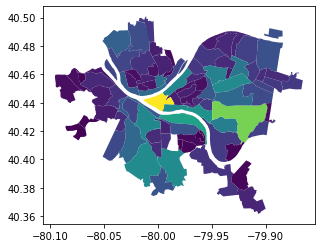

In [19]:
crash_map.plot(column='crash_count')

In [25]:
crashes_count.sort_values(by=['crash_count'])

,crash_count
hood,
Arlington Heights,9.0
East Carnegie,32.0
Chartiers City,40.0
Glen Hazel,49.0
Mt. Oliver,49.0
...,...
Carrick,1793.0
South Oakland,1892.0
South Side Flats,2156.0
